## Задача
0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей (попробовать разное их количество)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## 0. Описание задачи
Задача представляет собой определение наличие дождя завтра по данным полученным за предыдущий период.
Всего на вход подается 9 признаков о состоянии погоды за прошедшие 10 лет (наблюдения проводились ежедневно)

- Location - Имя города
- MinTemp - Минимальная температура за день
- MaxTemp - Максимальная температура за день
- Rainfall - Осадки за день (ММ)
- Evaporation - Испарение за день (ММ)
- Sunshine - Часы яркого солнечного света
- WindGusDir - Направления сильнейшего ветра за день (по компасу, 16 направлений)
- WindGuSpeed - Скорость сильнейшего ветра за день (КМ/ч)
- WindDir9am - Направление ветра за 10 минут до 9и утра
- WindDir3pm - Направление ветра за 10 минут до 3ех дня
- WindSpeed9am - Скорость ветра за 10 минут до 9и утра
- WindSpeed3pm - Скорость ветра за 10 минут до 3ех утра
- Humidity9am - Влажность воздуха в 9 утра (процент)
- Humidity3pm - Влажность воздуха в 3 дня (процент)
- Pressure9am - Атмосферное давление в 9 утра (гПа)
- Pressure3pm - Атмосферное давление в 3 дня (гПа)
- Cloud9am - Перекрытие неба облаками в 9 утра
- Cloud3pm - Перекрытие неба облаками в 3 дня
- Temp9am - Температура воздуха в 9 утра
- Temp3pm - Температура воздуха в 3 дня
- RainToday - Есть ли дождь в этот день (1/0)
- RainTomorrow - Есть ли дождь завтра (1/0)

## 1. Загрузка данных

In [2]:
train_data = pd.read_csv("Weather Training Data.csv")
X = train_data.drop(columns=["RainTomorrow", "row ID"])
y = train_data['RainTomorrow']
test_data = pd.read_csv("Weather Test Data.csv")
test_data = test_data.drop(columns=["row ID"])
df = pd.concat([X, test_data], axis=0)
train_data.dtypes

row ID            object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow       int64
dtype: object

## 2. Визуализация и основные статистические хар-ки

In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


<AxesSubplot:>

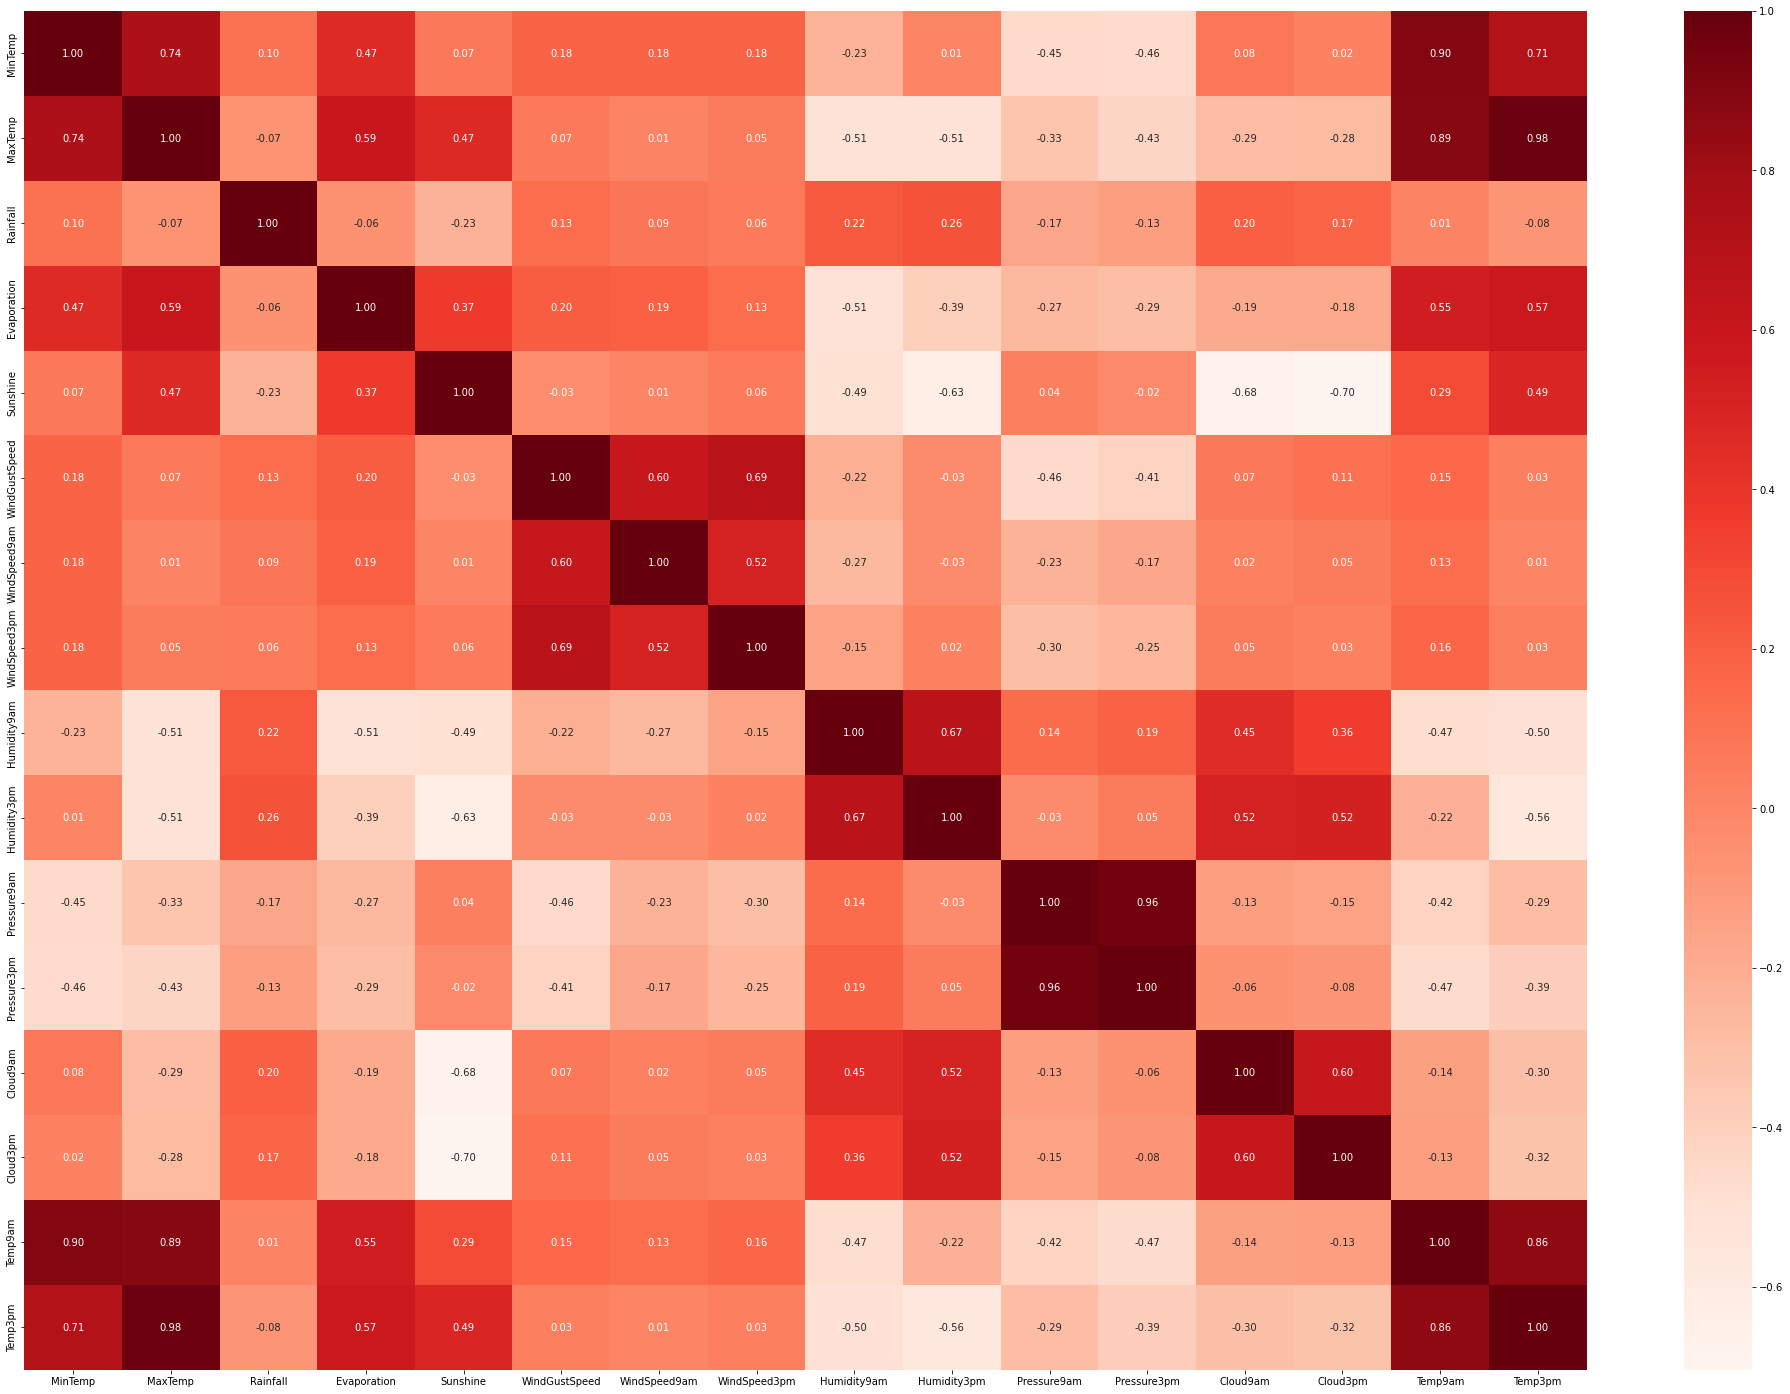

In [4]:
fig = plt.figure(figsize=(35,25))
fig.patch.set_facecolor('white')
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

## 3. Обработка пропущенных значений

In [5]:
categorical = df.select_dtypes(include = "object").columns
cleaner = ColumnTransformer([
    ('categorical_transformer', SimpleImputer(strategy='most_frequent'), categorical)
])
df[categorical] = cleaner.fit_transform(df[categorical])

In [6]:
df = df.fillna(train_data.median())
df.isnull().sum()

C:\Users\Eugen\AppData\Local\Temp\ipykernel_11524\2701602130.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(train_data.median())


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

## 4. Обработка категориальных значений

In [7]:
objects = df.select_dtypes(include = "object").columns
for i in range(len(objects)):
    df[objects[i]] = LabelEncoder().fit_transform(df[objects[i]])
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
dtype: object

## 5. Нормализация данных

In [8]:
to_normalize = df.drop(df[objects], axis=1)
normalized_df=(to_normalize-to_normalize.mean())/to_normalize.std()
#normalized_df=(to_normalize-to_normalize.min())/(to_normalize.max()-to_normalize.min())
df = pd.concat([normalized_df, df[objects]], axis=1)

## 6. Разбиение выборки на обучающую и тестирующую

In [9]:
train = df.iloc[:99516,:]
new_train = pd.concat([train, y], axis=1)
test = df.iloc[99516:, :]

In [10]:
X = new_train.drop(columns='RainTomorrow')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [11]:
print((df["Location"] == "Mildura").sum())

0


## 7, 8, 9. Обучение и тестирование различных классификаторов

In [12]:
LogRegression = LogisticRegression(max_iter=270, random_state=42, )
LogRegression.fit(X_train, y_train)
print('LogisticRegression Train Score is : ' , LogRegression.score(X_train, y_train))
print('LogisticRegression Test Score is : ' , LogRegression.score(X_test, y_test))

LogisticRegression Train Score is :  0.8427247148671054
LogisticRegression Test Score is :  0.8415393890675241


In [13]:
KNNClassifier = KNeighborsClassifier(n_neighbors= 7,weights ='uniform',algorithm='auto')
KNNClassifier.fit(X_train, y_train)

print('KNNClassifier Train Score is : ' , KNNClassifier.score(X_train, y_train))
print('KNNClassifier Test Score is : ' , KNNClassifier.score(X_test, y_test))

KNNClassifier Train Score is :  0.8619931668592674
KNNClassifier Test Score is :  0.826818729903537


In [14]:
gradient_boosting = GradientBoostingClassifier(n_estimators=350, max_depth=7, learning_rate=0.095, random_state=42)
gradient_boosting.fit(X_train, y_train)
print('LogisticRegression Train Score is : ' , gradient_boosting.score(X_train, y_train))
print('LogisticRegression Test Score is : ' , gradient_boosting.score(X_test, y_test))

LogisticRegression Train Score is :  0.8516555293171884
LogisticRegression Test Score is :  0.846161575562701


In [15]:
sv_classifier = SVC()
sv_classifier.fit(X_train, y_train)
print('sv_classifier Train Score is : ' , sv_classifier.score(X_train, y_train))
print('sv_classifier Test Score is : ' , sv_classifier.score(X_test, y_test))

sv_classifier Train Score is :  0.8447721449027785
sv_classifier Test Score is :  0.8446040996784566
